# Research Practicum

This notebook contains a model which uses the minvalue per hour per day per room.

<b> GET DATA </b>

In [2]:
#import pandas package to read and merge csv files
import pandas as pd
#import csv package for reading from and writing to csv files
import csv
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data from csv file into a data frame
# use double backslash to prevent unicode error from '\U' characters
wifi_df = pd.read_csv("D:\\Users\\Elayne Ruane\\Documents\\CSI MA\\research_practicum\\cleaned_data\\full.csv", names=['room', 'event_time', 'ass', 'auth'])

In [37]:
# check data loaded into data frame correctly
wifi_df.head()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


In [38]:
# check data loaded into data frame correctly
wifi_df.tail()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-17 11:01:59,4,18,18,school of computer science,11,17
2015-11-17 11:06:37,4,32,32,school of computer science,11,17
2015-11-17 11:13:19,4,39,39,school of computer science,11,17
2015-11-17 11:21:11,4,42,42,school of computer science,11,17
2015-11-17 11:26:07,4,46,46,school of computer science,11,17


<b> CLEAN DATA </b>

Convert timestamp to epoch time.

In [65]:
import time
from dateutil.parser import parse

def convert_to_epoch(df, column):
    '''function that reads in a dataframe with a column containing values in timestamp format and converts those values to epoch forma
   
    requires module time and parse function from dateutil.parser
    
    paramaters
    ----------
    df is a dataframe
    column is a string that denotes the name of the column containing value in timestamp format
    '''
    
    #for loop that iterates through each row in the dataframe
    for i in range(df.shape[0]):
        # variable 'x' is assigned the value from the column and row 'i'
        x = df[column][i]
        # variable 'y' is assigned the result of variable 'x' passed through the parse method 
        y = parse(x)
        # variable 'epoch' is assigned 'y' value converted to epoch time
        epoch = int(time.mktime(y.timetuple()))
        # set column value to value of variable 'epoch'
        df.set_value(i, column, epoch)
    return df

In [66]:
convert_to_epoch(wifi_df, 'event_time')

KeyError: 'event_time'

In [67]:
## Original code used to create convert_to_epoch() function above

#import time
#from dateutil.parser import parse

#for i in range(wifi_log_data.shape[0]):
#    x = wifi_log_data["event_time"][i]
#    y = parse(x)
#    epoch = int(time.mktime(y.timetuple()))
#    wifi_log_data.set_value(i,"event_time",epoch)

Clean Room Identifiers

In [68]:
def room_number(df, room_column):
    '''function that reads in a dataframe with a column containing room information in the format 'campus > building > roomcode-xxx' 
    and replaces the values in the column with just the room ID which is the last character of the string in that column.    
    '''
    # for loop that iterates through each row in the df
    for i in range(df.shape[0]):
        # selects last character of the string in the room_column which is the room ID
        df.set_value(i, room_column, df[room_column][i][-1:])
    return df

In [69]:
room_number(wifi_df, 'room')

TypeError: cannot do index indexing on <class 'pandas.tseries.index.DatetimeIndex'> with these indexers [0] of <class 'int'>

In [70]:
wifi_df.head()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


Add building.

In [71]:
wifi_df['building'] = 'school of computer science'

In [72]:
wifi_df.head()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


Clean Occupancy Data

In [73]:
# put survey data in a dataframe
occupancy_df = pd.read_csv("D:\\Users\\Elayne Ruane\\Documents\\CSI MA\\research_practicum\\cleaned_data\\survey_data.csv")

In [74]:
occupancy_df.head()

,Unnamed: 0,room,event_time,occupancy,building
0,0,4,1446454800,0.25,school of computer science
1,1,2,1446454800,0.25,school of computer science
2,2,3,1446454800,0.25,school of computer science
3,3,4,1446458400,0.50,school of computer science
4,4,2,1446458400,0.50,school of computer science


In [75]:
# delete column 'Unnamed: 0'
del occupancy_df['Unnamed: 0']

In [76]:
occupancy_df.head()

,room,event_time,occupancy,building
0,4,1446454800,0.25,school of computer science
1,2,1446454800,0.25,school of computer science
2,3,1446454800,0.25,school of computer science
3,4,1446458400,0.50,school of computer science
4,2,1446458400,0.50,school of computer science


Convert EPCOH time into human-readable format.

In [77]:
# convert 'event_time' values from EPOCH to DATETIME
wifi_df['event_time'] = pd.to_datetime(wifi_df.event_time, unit='s')
# use event_time as dataframe index 
wifi_df.set_index('event_time', inplace=True)

AttributeError: 'DataFrame' object has no attribute 'event_time'

In [78]:
wifi_df.head()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


In [79]:
# create two new columns, event_hour and event_day
wifi_df['event_hour'] = wifi_df.index.hour
wifi_df['event_day'] = wifi_df.index.day

In [80]:
wifi_df.head()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


In [81]:
# convert 'event_time' values from EPOCH to DATETIME
occupancy_df['event_time'] = pd.to_datetime(occupancy_df.event_time, unit='s')
# use event_time as dataframe index 
occupancy_df.set_index('event_time', inplace=True)

In [82]:
occupancy_df.head()

,room,occupancy,building
event_time,,,
2015-11-02 09:00:00,4,0.25,school of computer science
2015-11-02 09:00:00,2,0.25,school of computer science
2015-11-02 09:00:00,3,0.25,school of computer science
2015-11-02 10:00:00,4,0.50,school of computer science
2015-11-02 10:00:00,2,0.50,school of computer science


In [83]:
# create two new columns, event_hour and event_day
occupancy_df['event_hour'] = occupancy_df.index.hour
occupancy_df['event_day'] = occupancy_df.index.day

In [84]:
occupancy_df.head()

,room,occupancy,building,event_hour,event_day
event_time,,,,,
2015-11-02 09:00:00,4,0.25,school of computer science,9,2
2015-11-02 09:00:00,2,0.25,school of computer science,9,2
2015-11-02 09:00:00,3,0.25,school of computer science,9,2
2015-11-02 10:00:00,4,0.50,school of computer science,10,2
2015-11-02 10:00:00,2,0.50,school of computer science,10,2


<b> DATA ANALYSIS </b>

Survey data contains one recorded value per room, per day, per hour. Here, we take the min reading per hour, per day, per room.

In [85]:
df_min_conn = wifi_df.groupby(['room', 'event_day', 'event_hour'], as_index=False).min()

In [86]:
df_min_conn.tail()

,room,event_day,event_hour,ass,auth,building
1051,4,17,7,0,0,school of computer science
1052,4,17,8,0,0,school of computer science
1053,4,17,9,6,6,school of computer science
1054,4,17,10,5,5,school of computer science
1055,4,17,11,18,18,school of computer science


In [87]:
# merge data into single dataframe
df_min_conn['room'] = df_min_conn['room'].astype(int)
full_df = pd.merge(df_min_conn, occupancy_df, on=['room', 'event_day', 'event_hour'], how='inner')

full_df.head(15)

,room,event_day,event_hour,ass,auth,building_x,occupancy,building_y
0,2,3,9,0,0,school of computer science,0.00,school of computer science
1,2,3,10,26,26,school of computer science,0.50,school of computer science
2,2,3,11,23,23,school of computer science,0.50,school of computer science
3,2,3,12,3,3,school of computer science,0.50,school of computer science
4,2,3,13,6,6,school of computer science,0.00,school of computer science
5,2,3,14,32,32,school of computer science,0.75,school of computer science
6,2,3,15,29,29,school of computer science,0.25,school of computer science
7,2,3,16,31,30,school of computer science,0.25,school of computer science
8,2,4,9,7,7,school of computer science,0.25,school of computer science
9,2,4,10,10,9,school of computer science,0.25,school of computer science


In [88]:
# add column for number of estimated occupants based on room capacity * occupancy rate

def estimate_occ(df,room, occupancy_rate):
    '''function that caluclates the estimated number of room occupants
    
    parameters
    ----------
    df is a dataframe with columns room and occupancy_rate
    room is a string denoting a column in df that contains INT values representing room IDs
    occupancy_rate is a string denoting a column in df that contains DECIMAL values that represent the estimated room occupancy rate
    
    '''
    #for loop that iterates through each row of the df
    for i in range(df.shape[0]):
        
        #room two and three have capacity of 90
        if df[room][i] == 2 or df[room][i] == 3:
            # calculate estimated occupants for row, assign to variable 'est'
            est = df[occupancy_rate][i] * 90
            #set value in new column
            df.set_value(i, 'est_occupants', est)
        
        #room four has a capcity of 220
        elif df[room][i] == 4:
            est = df[occupancy_rate][i] * 220
            df.set_value(i, 'est_occupants', est)
        
        else:
            raise ValueError('Incorrect room number:', df[room][i])
            

In [89]:
estimate_occ(full_df, 'room', 'occupancy')

In [90]:
full_df.head()

,room,event_day,event_hour,ass,auth,building_x,occupancy,building_y,est_occupants
0,2,3,9,0,0,school of computer science,0.0,school of computer science,0
1,2,3,10,26,26,school of computer science,0.5,school of computer science,45
2,2,3,11,23,23,school of computer science,0.5,school of computer science,45
3,2,3,12,3,3,school of computer science,0.5,school of computer science,45
4,2,3,13,6,6,school of computer science,0.0,school of computer science,0


In [91]:
# look at correlations for estimated occupants and associated devices
full_df[['ass', 'auth', 'est_occupants']].corr()

,ass,auth,est_occupants
ass,1.000000,0.999770,0.405152
auth,0.999770,1.000000,0.405234
est_occupants,0.405152,0.405234,1.000000


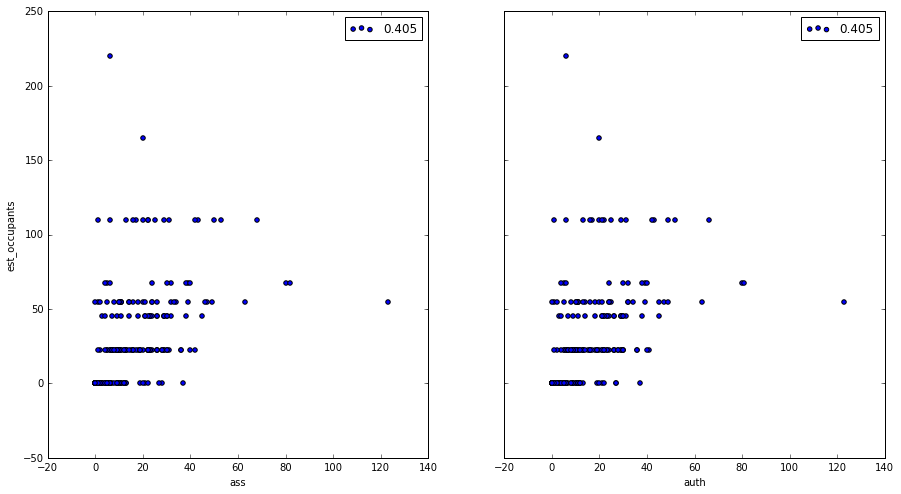

In [92]:
fig, axs = plt.subplots(1, 2, sharey=True)
full_df.plot(kind='scatter', x='ass', y='est_occupants', label='%.3f' 
        % full_df[['ass', 'est_occupants']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
full_df.plot(kind='scatter', x='auth', y='est_occupants', label='%.3f' 
        % full_df[['auth', 'est_occupants']].corr().as_matrix()[0,1], ax=axs[1])

Linear Regression Model

In [93]:
import statsmodels.formula.api as sm

In [94]:
# can also use associated but higher correlation with authenticated 
lm = sm.ols(formula='est_occupants ~ auth', data=full_df).fit()

In [95]:
print(lm.params)

Intercept    18.078131
auth          0.867870
dtype: float64


In [96]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          est_occupants   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     42.05
Date:                Tue, 05 Jul 2016   Prob (F-statistic):           6.07e-10
Time:                        14:21:42   Log-Likelihood:                -1052.4
No. Observations:                 216   AIC:                             2109.
Df Residuals:                     214   BIC:                             2116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.0781      3.126      5.782      0.0

Test the model.

In [97]:
full_df.describe()

,room,event_day,event_hour,ass,auth,occupancy,est_occupants
count,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000
mean,3.000000,8.111111,12.50000,17.009259,16.884259,0.250000,32.731481
std,0.818393,3.486408,2.29661,16.265241,16.180394,0.218345,34.652825
min,2.000000,3.000000,9.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,10.75000,6.000000,6.000000,0.000000,0.000000
50%,3.000000,9.000000,12.50000,12.000000,12.000000,0.250000,22.500000
75%,4.000000,11.000000,14.25000,24.000000,24.000000,0.250000,55.000000
max,4.000000,13.000000,16.00000,123.000000,123.000000,1.000000,220.000000


In [98]:
test_df = pd.DataFrame({'auth':[30]}) #taking the mean value (rounded to decimal)
test_df.head()

,auth
0,30


In [99]:
lm.predict(test_df)

array([ 44.11424594])

Plot the model

In [100]:
minmax_df = pd.DataFrame({'auth': [full_df.auth.min(), full_df.auth.max()]})
minmax_df.head()

,auth
0,0
1,123


In [101]:
#predict values based on the maximum and minimum value experienced.

predictions = lm.predict(minmax_df)
predictions

array([  18.07813098,  124.82620231])

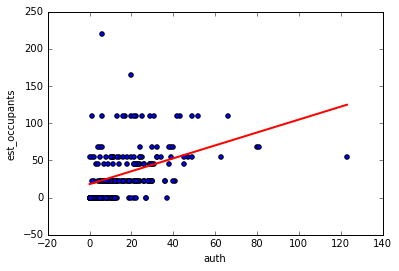

In [102]:
full_df.plot(kind='scatter', x='auth', y='est_occupants')
plt.plot(minmax_df, predictions, c='red', linewidth=2)

In [103]:
# predictions for entire dataframe
predict_df = pd.DataFrame({'real_val': full_df['est_occupants'], 'predict': lm.predict(full_df)})

In [104]:
predict_df

,predict,real_val
0,18.078131,0.0
1,40.642764,45.0
2,38.039152,45.0
3,20.681742,45.0
4,23.285354,0.0
5,45.849987,67.5
6,43.246375,22.5
7,44.114246,22.5
8,24.153224,22.5
9,25.888965,22.5


In [105]:
predict_df[['predict', 'real_val']].corr()

,predict,real_val
predict,1.000000,0.405234
real_val,0.405234,1.000000


In [106]:
# calculate average difference 
count = 0
total = 0
for i in range(predict_df.shape[0]):
    diff = abs(predict_df['real_val'][i] - predict_df['predict'][i])
    count += 1
    total += diff
avg_diff = float(total/count)

print(avg_diff)

22.340403210826505
